# **Perceptron Trick for Logistic Regression**

In [66]:
from sklearn.datasets import make_classification
import numpy as np 
import matplotlib.pyplot as plt

In [67]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

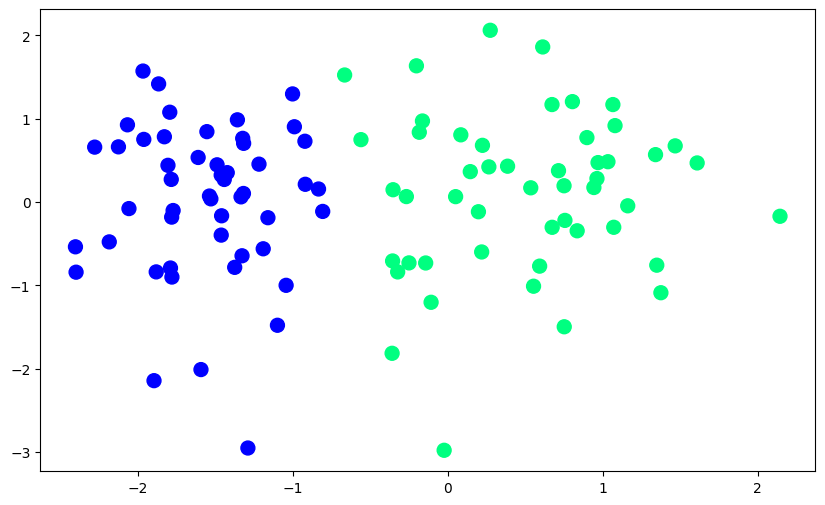

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [69]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [70]:
def perceptron(X,y):
    X = np.insert(X,0,1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0], weights[1:]

In [71]:
def step(z):
    return 1 if z > 0 else 0

In [72]:
intercept_, coef_ = perceptron(X,y)

In [73]:
print(coef_)
print(intercept_)

[1.30327427 0.08523305]
1.0


In [74]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [75]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

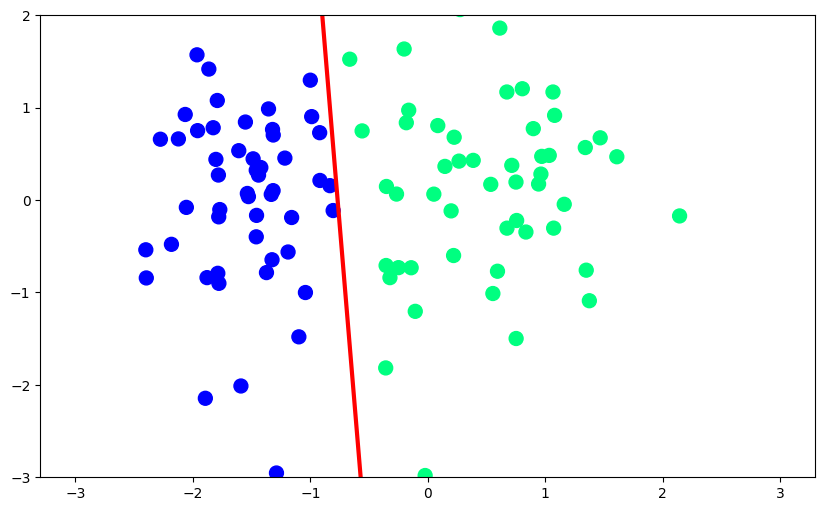

In [76]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [77]:
def perceptron(X,y):
    
    m = []
    b = []

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    
    return m, b

In [78]:
m, b = perceptron(X, y)

In [79]:
b[0]

-1.0

In [80]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [81]:
# fig, ax = plt.subplots(figsize=(9,5))

# x_i = np.arange(-3, 3, 0.1)
# y_i = x_i * m[0] + b[0]

# ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
# plt.ylim(-3,3)
# def update(i):
#     label = 'epoch {0}'.format(i + 1)
#     line.set_ydata(x_i*m[i] + b[i])
#     ax.set_xlabel(label)
#     # return line, ax

# anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [83]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [84]:
x_input1 = np.linspace(-3, 3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

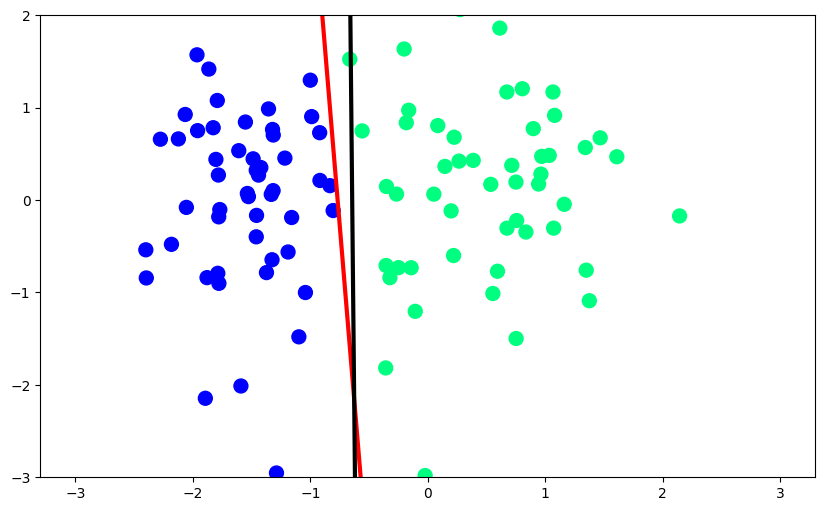

In [85]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)